# Restaurant Food Price Prediction

In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
# read the excel files
df_train =pd.read_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16\Restaurant Food Price\Data_Train.xlsx")
df_test =pd.read_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16\Restaurant Food Price\Data_Test.xlsx")

In [3]:
df_train.shape

(12690, 9)

In [4]:
df_test.shape

(4231, 8)

In [5]:
data= df_train.append(df_test)

In [6]:
data.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


In [7]:
#check the info of the data dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 9 columns):
CITY             16774 non-null object
COST             12690 non-null float64
CUISINES         16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
# checking the null values

data.isnull().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [9]:
data.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
       'TIME', 'TITLE', 'VOTES'],
      dtype='object')

#### Treatment of the Missing Values

In [10]:
a=data.CITY.mode()
b=data.LOCALITY.mode()
#a[0]
data.CITY.fillna(a[0],inplace=True)
data.LOCALITY.fillna(b[0],inplace=True)
data.RATING.fillna(0,inplace=True)

In [11]:
data.VOTES.fillna(0,inplace=True)

### Feature Preprocessing and Feature Engineering

In [12]:
max=1
for i in data['CUISINES']:
    if len(i.split(','))> max:
        max=len(i.split(','))
print ('Max length :%d' %max)

Max length :8


In [13]:
a=data['CUISINES'].str.split(',')

data['CUISINES_1']= a.str[0]
data['CUISINES_2']= a.str[1]
data['CUISINES_3']= a.str[2]
data['CUISINES_4']= a.str[3]
data['CUISINES_5']= a.str[4]
data['CUISINES_6']= a.str[5]
data['CUISINES_7']= a.str[6]
data['CUISINES_8']= a.str[7]


data['CUISINES_1'].fillna("0",inplace=True)
data['CUISINES_2'].fillna("0",inplace=True)
data['CUISINES_3'].fillna("0",inplace=True)
data['CUISINES_4'].fillna("0",inplace=True)
data['CUISINES_5'].fillna("0",inplace=True)
data['CUISINES_6'].fillna("0",inplace=True)
data['CUISINES_7'].fillna("0",inplace=True)
data['CUISINES_8'].fillna("0",inplace=True)

In [14]:
maxim=1
for i in data['TITLE']:
    if len(i.split(','))> maxim:
        maxim=len(i.split(','))
print ('Max length :%d' %maxim)

Max length :2


In [15]:
a=data['TITLE'].str.split(',')

data['TITLE_1']= a.str[0]
data['TITLE_2']= a.str[1]

data['TITLE_1'].fillna("0",inplace=True)
data['TITLE_2'].fillna("0",inplace=True)

In [16]:
data.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,TITLE_1,TITLE_2
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,Malwani,Goan,North Indian,0,0,0,0,0,CASUAL DINING,0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,Asian,Modern Indian,Japanese,0,0,0,0,0,CASUAL DINING,BAR
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,North Indian,Chinese,Biryani,Hyderabadi,0,0,0,0,CASUAL DINING,0
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,Tibetan,Chinese,0,0,0,0,0,0,QUICK BITES,0
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,Desserts,0,0,0,0,0,0,0,DESSERT PARLOR,0


In [17]:
a=data['VOTES'].str.split()
data['VOTES_count']=a.str[0]
data['VOTES_count'].fillna(0,inplace=True)

In [18]:
data.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
       'TIME', 'TITLE', 'VOTES', 'CUISINES_1', 'CUISINES_2', 'CUISINES_3',
       'CUISINES_4', 'CUISINES_5', 'CUISINES_6', 'CUISINES_7', 'CUISINES_8',
       'TITLE_1', 'TITLE_2', 'VOTES_count'],
      dtype='object')

In [19]:
data.drop(labels=['CUISINES','RESTAURANT_ID','TIME','TITLE', 'VOTES'],axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 15 columns):
CITY           16921 non-null object
COST           12690 non-null float64
LOCALITY       16921 non-null object
RATING         16921 non-null object
CUISINES_1     16921 non-null object
CUISINES_2     16921 non-null object
CUISINES_3     16921 non-null object
CUISINES_4     16921 non-null object
CUISINES_5     16921 non-null object
CUISINES_6     16921 non-null object
CUISINES_7     16921 non-null object
CUISINES_8     16921 non-null object
TITLE_1        16921 non-null object
TITLE_2        16921 non-null object
VOTES_count    16921 non-null object
dtypes: float64(1), object(14)
memory usage: 2.1+ MB


### EDA

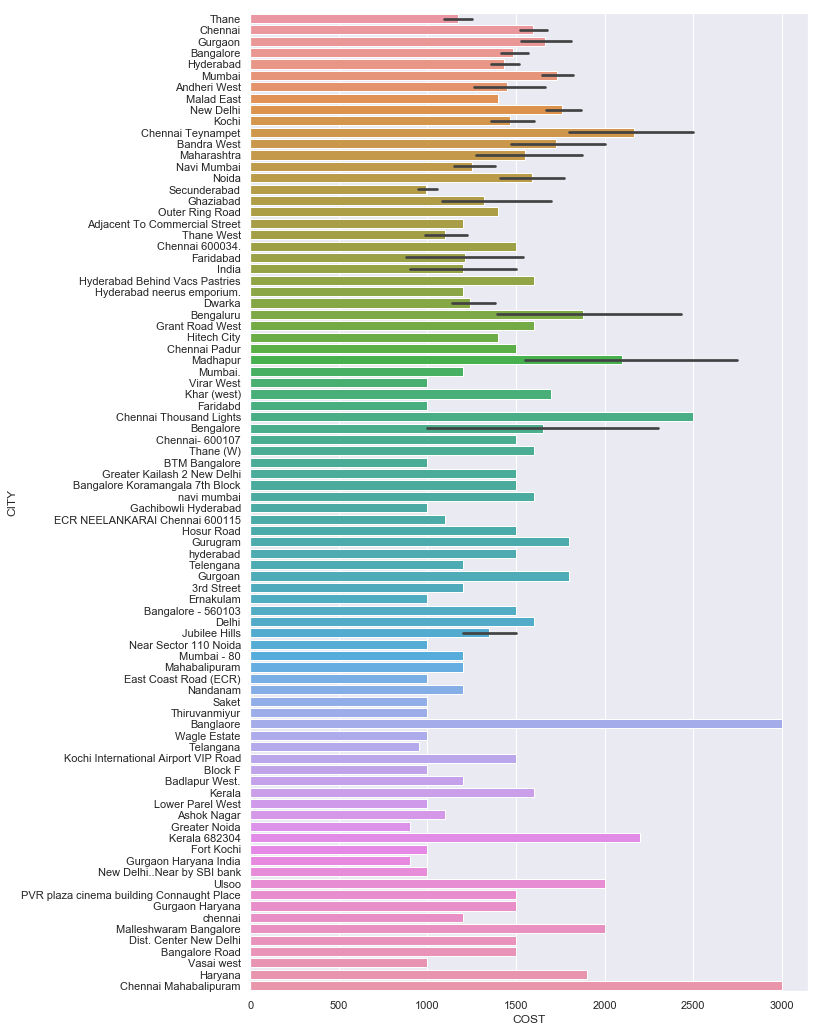

In [21]:
# Bivariate Analysis

Q3 = data.COST.quantile(0.75)
Q3
a = data[data['COST']> 800]
#a
plt.figure(figsize=(10,18))
sns.barplot(x='COST',y='CITY',data=a)

##### By this we can observe that Bangalore and Chennai has the most expensive restaurants.

In [22]:
data.RATING.replace("-",0,regex=True,inplace=True)
data.RATING.replace("NEW",0,regex=True,inplace=True)

In [23]:
data['RATING']=data.RATING.astype(float)
data['VOTES_count']=data.VOTES_count.astype(float)

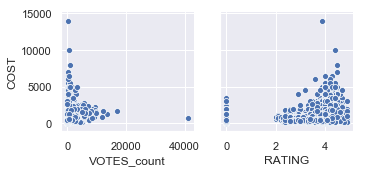

In [24]:
sns.pairplot(y_vars='COST',x_vars=['VOTES_count','RATING'],data=data,kind='scatter')

##### By this we can oberve that the cost of the food increases with the rating of the restaurant

In [25]:
data.columns

Index(['CITY', 'COST', 'LOCALITY', 'RATING', 'CUISINES_1', 'CUISINES_2',
       'CUISINES_3', 'CUISINES_4', 'CUISINES_5', 'CUISINES_6', 'CUISINES_7',
       'CUISINES_8', 'TITLE_1', 'TITLE_2', 'VOTES_count'],
      dtype='object')

In [26]:
# Lets convert the categorical into numerical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols= ['CITY', 'LOCALITY','CUISINES_1', 'CUISINES_2','CUISINES_3', 'CUISINES_4', 'CUISINES_5', 'CUISINES_6', 
                'CUISINES_7','CUISINES_8', 'TITLE_1', 'TITLE_2']

# apply le on categorical feature columns
data[cols] = data[cols].apply(lambda col: le.fit_transform(col))

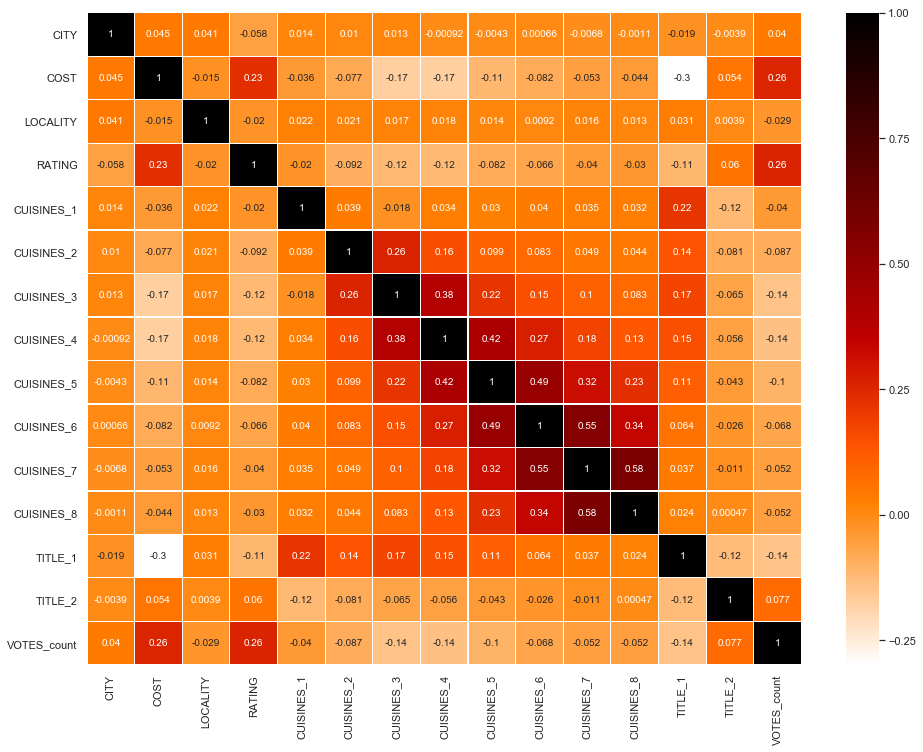

In [27]:
#check the correlation

plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),cmap='gist_heat_r',linewidths=0.1,linecolor='w',annot=True)

##### By this correlation heat map, we can clearly observe that RATING and VOTES play an important role in the COST of the food.

In [28]:
df_train = data[0:12690]
df_test = data[12690:]
df_test = df_test.drop(['COST'], axis =1)

In [29]:
data.LOCALITY.unique()

array([ 328, 1214, 1272, ..., 1040, 1251, 1148], dtype=int64)

In [30]:
X = df_train.drop(['COST'],axis = 1)
y = df_train['COST']

In [31]:
X.head()

,CITY,LOCALITY,RATING,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,TITLE_1,TITLE_2,VOTES_count
0,400,328,3.6,61,32,71,89,83,75,57,22,5,0,49.0
1,75,1214,4.2,6,62,45,89,83,75,57,22,5,2,30.0
2,75,1272,3.8,74,23,14,34,83,75,57,22,5,0,221.0
3,277,161,4.1,102,23,100,89,83,75,57,22,23,0,24.0
4,277,709,3.8,30,100,100,89,83,75,57,22,9,0,165.0


In [32]:
# Scaling the features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)

In [33]:
# Segregate the data set into train and test set

from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

## Linear Regression

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# Lets calculate the score on the train set

lr_predicted_train = lr.predict(train_X)
lr_score_train = mean_squared_error(train_y,lr_predicted_train)

print ('Linear Model on the train set :')
print ('Mean Squared Error: %.2f' %(lr_score_train))
print ('Root Mean Squared Error: %.2f' %((np.sqrt(lr_score_train))))

Linear Model on the train set :
Mean Squared Error: 333132.47
Root Mean Squared Error: 577.18


## Implementing the XG Boosting

In [36]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth=7,learning_rate=0.099,n_estimators=200,objective='reg:linear',colsample_bytree=0.7,
                           reg_alpha=10,subsample=1,random_state=42)

In [37]:
xgb_reg.fit(train_X,train_y)

xgb_predicted = xgb_reg.predict(test_X)
xgb_score = mean_squared_error(test_y,xgb_predicted)

print ('XG Boosting Regression Model :')
print ('Mean Squared Error: %.2f' %(xgb_score))
print ('Root Mean Squared Error: %.2f' %((np.sqrt(xgb_score))))

[22:52:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG Boosting Regression Model :
Mean Squared Error: 89900.94
Root Mean Squared Error: 299.83


### XG Boost Algorithm to predict the price of flight ticket for test set

In [38]:
X = df_test

In [39]:
# Scaling the features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)

In [40]:
# Predicting the fees for the data_test using XGB Regressor

xgb_predicted_test = xgb_reg.predict(X)
xgb_predicted_test

array([1174.1696 ,  409.93958,  664.62866, ...,  322.30136,  255.47116,
        364.5013 ], dtype=float32)

In [41]:
df_new =pd.read_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16\Restaurant Food Price\Data_Test.xlsx")

In [42]:
df_new['COST']=pd.DataFrame(xgb_predicted_test)

In [43]:
df_new.to_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16\Restaurant Food Price/myRestaurantCostPrediction.xlsx")